## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

*   Commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

*   Simple plots are then (fairly) simple to create.


Text(0, 0.5, 'Position (km)')

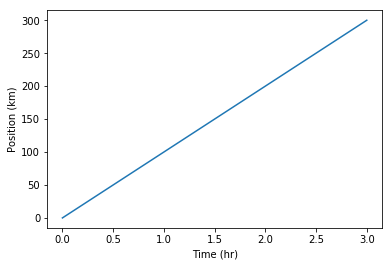

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

*   We can also plot [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
*   This implicitly uses [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values


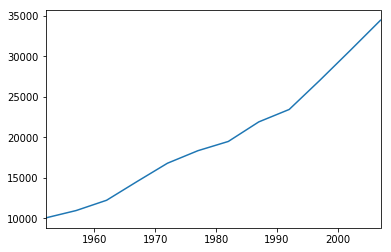

In [5]:
import pandas

data = pandas.read_csv('../data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')
# Convert year values to integers, saving results back to dataframe
data.columns = years.astype(int)

data.loc['Australia'].plot()

## Select and transform data, then plot it.

*   By default, [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots with the rows as the X axis.

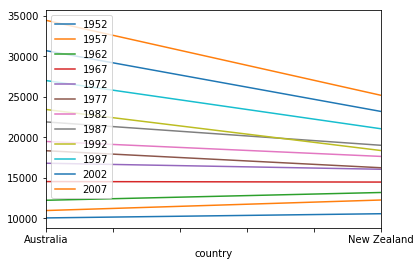

In [9]:
data.plot()

*   We can transpose the data in order to plot multiple series.

Text(0, 0.5, 'GDP per capita')

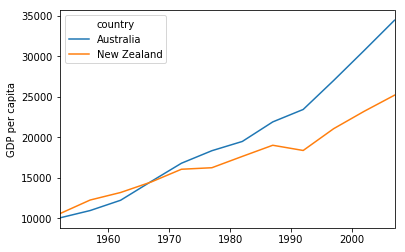

In [6]:
data.T.plot()
plt.ylabel('GDP per capita')

## Many styles of plot are available.

*   For example, do a bar plot using a fancier style.


Text(0, 0.5, 'GDP per capita')

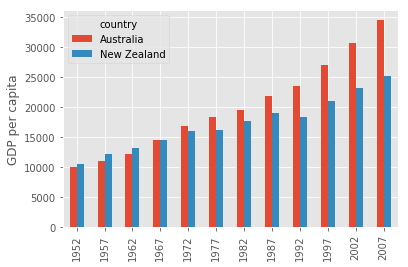

In [10]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

## Data can also be plotted by calling the `matplotlib` `plot` function directly.
*   The command is `plt.plot(x, y)`
*   The color / format of markers can also be specified as an optical argument: e.g. 'b-' is a blue line, 'g--' is a green dashed line.

## Get Australia data from dataframe

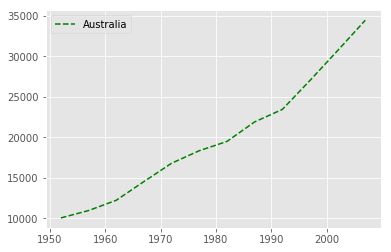

In [12]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')
plt.legend()

## Can plot many sets of data together.

Text(0, 0.5, 'GDP per capita ($)')

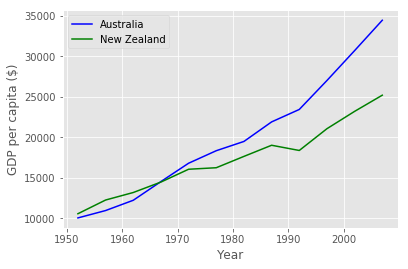

In [13]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

*   Plot a scatter plot correlating the GDP of Australia and New Zealand
*   Use either `plt.scatter` or `DataFrame.plot.scatter`


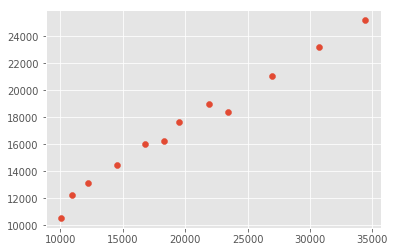

In [19]:
plt.scatter(gdp_australia, gdp_nz)

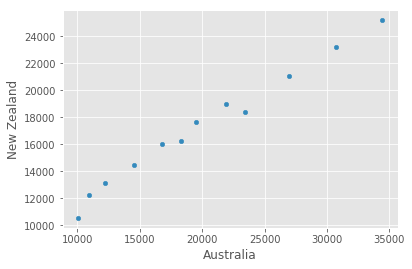

In [18]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

# Examples

> ## Minima and Maxima

> Fill in the blanks below to plot the minimum GDP per capita over time
> for all the countries in Europe.
> Modify it again to plot the maximum GDP per capita over time for Europe.

In [ ]:
data_europe = pandas.read_csv('../data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90)


> ## Correlations
>
> Modify the example in the notes to create a scatter plot showing
> the relationship between the minimum and maximum GDP per capita
> among the countries in Asia for each year in the data set.
> What relationship do you see (if any)?


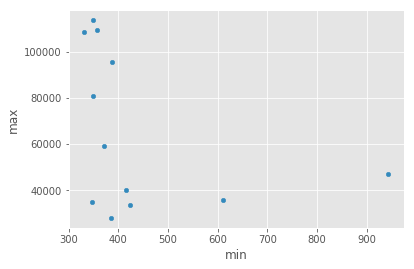

In [20]:
data_asia = pandas.read_csv('../data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

No particular correlations can be seen between the minimum and maximum gdp values
year on year. It seems the fortunes of asian countries do not rise and fall together.

You might note that the variability in the maximum is much higher than
that of the minimum.  Take a look at the maximum and the max indexes:

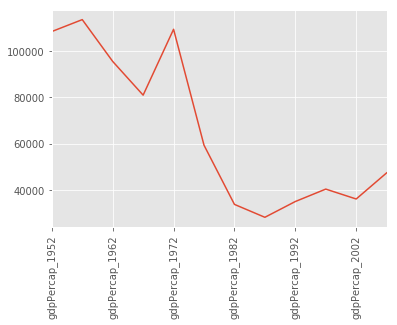

In [26]:
data_asia = pandas.read_csv('../data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot(rot=90)

Seems the variability in this value is due to a sharp drop after 1972. Some geopolitics at play perhaps? Given the dominance of oil producing countries, maybe the Brent crude index would make an interesting comparison? Whilst Myanmar consistently has the lowest gdp, the highest gdb nation has varied more notably.

> ## More Correlations
>
> This short program creates a plot showing
> the correlation between GDP and life expectancy for 2007,
> normalizing marker size by population:

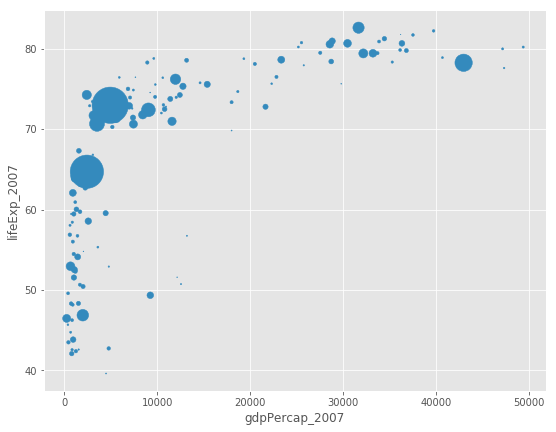

In [31]:
data_all = pandas.read_csv('../data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter',
              x='gdpPercap_2007',
              y='lifeExp_2007',
              s=data_all['pop_2007']/1e6,
              figsize=(9, 7)
             )

> Using online help and other resources, explain what each argument to `plot` does.

> ## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file,
perhaps to include it in a publication. There is a function in the
matplotlib.pyplot module that accomplishes this:
[savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html).
Calling this function, e.g. with

~~~python
plt.savefig('my_figure.png')
~~~

will save the current figure to the file `my_figure.png`. The file format
will automatically be deduced from the file name extension (other formats
are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable
and after a figure has been displayed to the screen (e.g. with `plt.show`) 
matplotlib will make this  variable refer to a new empty figure.
Therefore, make sure you call `plt.savefig` before the plot is displayed to
the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line,
and `plt.savefig` seems not to be a possible approach.
One possibility to save the figure to file is then to

* save a reference to the current figure in a local variable (with `plt.gcf`) 
* call the `savefig` class method from that varible.

<Figure size 432x288 with 0 Axes>

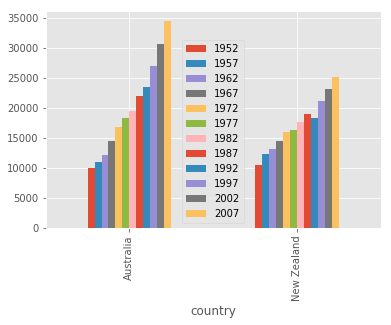

In [32]:
fig = plt.gcf() # get current figure
data.plot(kind='bar')
fig.savefig('../images/my_figure.png')

# Where to?

[Check-in](01-Checkin.ipynb) for coding styles.

### Questions:
- "How can I plot my data?"
- "How can I save my plot for publishing?"

### Objectives:
- "Create a time series plot showing a single data set."
- "Create a scatter plot showing relationship between two data sets."

### Keypoints:
- "[`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python."
- "Plot data directly from a Pandas dataframe."
- "Select and transform data, then plot it."
- "Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options."
- "Can plot many sets of data together."

## References

### Software Carpentry
* [Plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/)

### Other
*   [PEP8](https://www.python.org/dev/peps/pep-0008):
    a style guide for Python that discusses topics such as how you should name variables,
    how you should use indentation in your code,
    how you should structure your `import` statements,
    etc.
    Adhering to PEP8 makes it easier for other Python developers to read and understand your code,
    and to understand what their contributions should look like.
    The [PEP8 application and Python library](https://pypi.python.org/pypi/pep8)
    can check your code for compliance with PEP8.
*   [Google style guide on Python](https://google.github.io/styleguide/pyguide.html) 
    supports the use of PEP8 and extend the coding style to more specific structure of 
    a Python code, which may be interesting also to follow.